In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

### Merging all 3 datasets

In [53]:
sales1 = pd.read_csv('sales_data.csv')
sales1.head()

,CustomerID,date,item_id,item_price,date_block_num,shop_id,item_cnt_day,Quantity,shipment
0,7311,02.01.2013,22154,999.00,0,59,1,2,1
1,1663,03.01.2013,2552,899.00,0,25,1,2,1
2,9376,05.01.2013,2552,899.00,0,25,-1,2,1
3,7634,06.01.2013,2554,1709.05,0,25,1,2,1
4,8808,15.01.2013,2555,1099.00,0,25,1,2,1


In [5]:
item = pd.read_csv('item.csv',encoding= 'unicode_escape')
item.head()

,item_name,item_id,item_category_id
0,POWER IN glamor (PLAST.) D,0,40
1,ABBYY FineReader 12 Professional Edition Full ...,1,76
2,In the glory (UNV) D,2,40
3,BLUE WAVE (Univ) D,3,40
4,BOX (GLASS) D,4,40


In [6]:
item_cat = pd.read_csv('item_categories.csv')
item_cat.head()

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [7]:
items = pd.merge(item_cat, item, on='item_category_id')
items.head()

,item_category_name,item_category_id,item_name,item_id
0,PC - Headsets / Headphones,0,PC: Headset HyperX Cloud Core's stereo (KHX-HS...,5441
1,PC - Headsets / Headphones,0,Headphones PHILIPS SBC HC8680,16255
2,PC - Headsets / Headphones,0,Headphones RITMIX RH-120,16256
3,PC - Headsets / Headphones,0,Headphones RITMIX RH-124 Black,16257
4,Accessories - PS2,1,PS2: Memory Card 8 MB Black (Memory Card 8Mb -...,5606


In [10]:
df = pd.merge(sales1, items, on='item_id')
df.head()

,CustomerID,date,item_id,item_price,date_block_num,shop_id,item_cnt_day,Quantity,shipment,item_category_name,item_category_id,item_name
0,7311,02.01.2013,22154,999.0,0,59,1,2,1,Movie - Blu-Ray,37,Scene 2012 (BD)
1,3077,23.01.2013,22154,999.0,0,24,1,3,0,Movie - Blu-Ray,37,Scene 2012 (BD)
2,8805,20.01.2013,22154,999.0,0,27,1,2,0,Movie - Blu-Ray,37,Scene 2012 (BD)
3,8592,02.01.2013,22154,999.0,0,25,1,3,0,Movie - Blu-Ray,37,Scene 2012 (BD)
4,3899,03.01.2013,22154,999.0,0,25,1,3,0,Movie - Blu-Ray,37,Scene 2012 (BD)


In [11]:
#saving dataset
df.to_csv (r'C:\Users\kaviy\Desktop\ADM_Final\all_sales.csv', index = False, header=True)


### Reading all_sales.csv

In [2]:
sales1 = pd.read_csv('all_sales.csv')
sales=sales1.drop(['date'], axis=1)
#sales.drop(columns=['date'])
sales.head()

,CustomerID,item_id,item_price,date_block_num,shop_id,item_cnt_day,Quantity,shipment,item_category_name,item_category_id,item_name
0,7311,22154,999.0,0,59,1,2,1,Movie - Blu-Ray,37,Scene 2012 (BD)
1,3077,22154,999.0,0,24,1,3,0,Movie - Blu-Ray,37,Scene 2012 (BD)
2,8805,22154,999.0,0,27,1,2,0,Movie - Blu-Ray,37,Scene 2012 (BD)
3,8592,22154,999.0,0,25,1,3,0,Movie - Blu-Ray,37,Scene 2012 (BD)
4,3899,22154,999.0,0,25,1,3,0,Movie - Blu-Ray,37,Scene 2012 (BD)


In [3]:
sales.fillna(0)

,CustomerID,item_id,item_price,date_block_num,shop_id,item_cnt_day,Quantity,shipment,item_category_name,item_category_id,item_name
0,7311,22154,999.0,0,59,1,2,1,Movie - Blu-Ray,37,Scene 2012 (BD)
1,3077,22154,999.0,0,24,1,3,0,Movie - Blu-Ray,37,Scene 2012 (BD)
2,8805,22154,999.0,0,27,1,2,0,Movie - Blu-Ray,37,Scene 2012 (BD)
3,8592,22154,999.0,0,25,1,3,0,Movie - Blu-Ray,37,Scene 2012 (BD)
4,3899,22154,999.0,0,25,1,3,0,Movie - Blu-Ray,37,Scene 2012 (BD)
...,...,...,...,...,...,...,...,...,...,...,...
499995,5714,6107,998.0,4,50,1,1,1,Games - PS3,19,Red Faction: Armageddon - Commando & Recon Edi...
499996,8885,11098,499.0,4,50,1,2,1,Movie - Blu-Ray,37,Notebook WB (BD)
499997,8194,11702,22.4,4,50,1,1,0,Movie - DVD,40,EARTHQUAKE (region)
499998,4598,7119,398.0,4,52,1,2,1,Games PC - Additional publications,28,Total War: Shogun 2 - Sunset samurai. Collecto...


### Spliting dataset

In [4]:
msk = np.random.rand(len(sales)) < 0.8
train = sales[msk]
test = sales[~msk]

In [5]:
train.shape,test.shape

((399729, 11), (100271, 11))

Text(0.5, 1.0, 'Price Distribution')

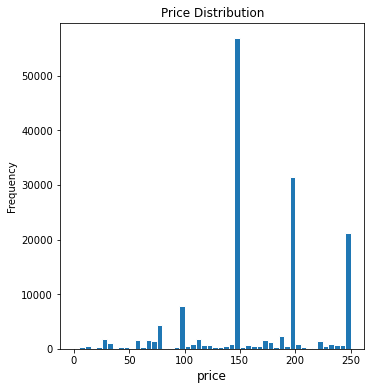

In [113]:
plt.subplot(1, 2, 1)
(sales['item_price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

In [114]:
sales['shipment'].value_counts() / len(sales)

1.0    0.600352
0.0    0.399648
Name: shipment, dtype: float64

### How shipping releated to price?

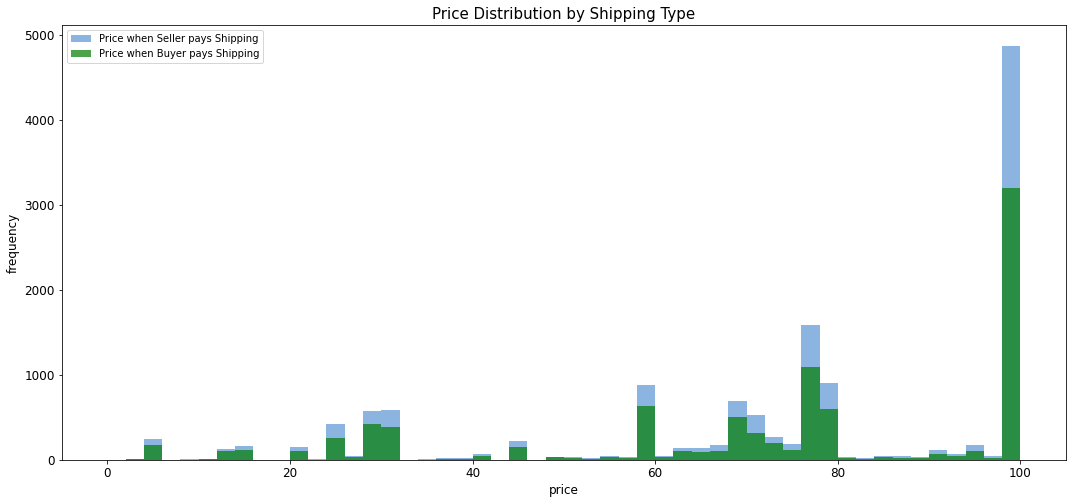

In [115]:
shipping_fee_by_buyer = sales.loc[df['shipment'] == 0, 'item_price']
shipping_fee_by_seller = sales.loc[df['shipment'] == 1, 'item_price']
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(shipping_fee_by_seller, color='#8CB4E1', alpha=1.0, bins=50, range = [0, 100],
       label='Price when Seller pays Shipping')
ax.hist(shipping_fee_by_buyer, color='#007D00', alpha=0.7, bins=50, range = [0, 100],
       label='Price when Buyer pays Shipping')
plt.xlabel('price', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

### Category Names

In [116]:
print('There are', sales['item_category_name'].nunique(), 'unique values in category name column')

There are 59 unique values in category name column


#### Top 10 Common Category Names

In [117]:
sales['item_category_name'].value_counts()[:10]


Movie - DVD                           125232
Games PC - Standard Edition            75447
Music - CD of local production         56246
Games - PS3                            36838
Movie - Blu-Ray                        26631
Games PC - Additional publications     21661
Games - XBOX 360                       19035
Games - PSP                            11661
Program - For home and office           9861
Gifts - Development                     8967
Name: item_category_name, dtype: int64

### LightGBM

In [6]:
NUM_BRANDS = 4000
NUM_CATEGORIES = 1000
NAME_MIN_DF = 10
MAX_FEATURES_ITEM_DESCRIPTION = 50000

In [7]:
def to_categorical(dataset):
    dataset['item_category_name'] = dataset['item_category_name'].astype('category')
    dataset['item_name'] = dataset['item_name'].astype('category')
   

In [8]:
msk = np.random.rand(len(sales)) < 0.8
train = sales[msk]
test = sales[~msk]
test_new = test.drop('item_price', axis=1)
y_test = np.log1p(test["item_price"])
train.head()

,CustomerID,item_id,item_price,date_block_num,shop_id,item_cnt_day,Quantity,shipment,item_category_name,item_category_id,item_name
0,7311,22154,999.0,0,59,1,2,1,Movie - Blu-Ray,37,Scene 2012 (BD)
3,8592,22154,999.0,0,25,1,3,0,Movie - Blu-Ray,37,Scene 2012 (BD)
5,9318,22154,999.0,0,25,1,1,1,Movie - Blu-Ray,37,Scene 2012 (BD)
6,3410,22154,999.0,0,25,1,2,1,Movie - Blu-Ray,37,Scene 2012 (BD)
7,3749,22154,999.0,0,25,1,2,1,Movie - Blu-Ray,37,Scene 2012 (BD)


In [9]:
#Drop rows where price = 0
train = train[train.item_price != 0].reset_index(drop=True)


nrow_train = train.shape[0]
y = np.log1p(train["item_price"])
merge: pd.DataFrame = pd.concat([train, test_new])

C:\Users\kaviy\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
to_categorical(merge)
merge.head()
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499994
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   CustomerID          500000 non-null  int64   
 1   item_id             500000 non-null  int64   
 2   item_price          399607 non-null  float64 
 3   date_block_num      500000 non-null  int64   
 4   shop_id             500000 non-null  int64   
 5   item_cnt_day        500000 non-null  int64   
 6   Quantity            500000 non-null  int64   
 7   shipment            500000 non-null  int64   
 8   item_category_name  500000 non-null  category
 9   item_category_id    500000 non-null  int64   
 10  item_name           500000 non-null  category
dtypes: category(2), float64(1), int64(8)
memory usage: 40.0 MB


#### Count vectorize item_name and item_category_ name columns.

In [11]:
cv = CountVectorizer(min_df=NAME_MIN_DF)
X_name = cv.fit_transform(merge['item_name'])

In [12]:
cv = CountVectorizer()
X_category = cv.fit_transform(merge['item_category_name'])

In [13]:
tv = TfidfVectorizer(max_features=MAX_FEATURES_ITEM_DESCRIPTION, ngram_range=(1, 3), stop_words='english')
X_description = tv.fit_transform(merge['item_name'])

#### Create dummy variables for  shipping columns.



In [14]:
X_dummies = csr_matrix(pd.get_dummies(merge[[ 'shipment']], sparse=True).values)

In [15]:
sparse_merge = hstack((X_dummies,X_description, X_category, X_name)).tocsr()
sparse_merge.shape


(500000, 56791)

In [16]:
mask = np.array(np.clip(sparse_merge.getnnz(axis=0) - 1, 0, 1), dtype=bool)
sparse_merge = sparse_merge[:, mask]

sparse_merge.shape


(500000, 55170)

In [17]:
#Separate train and test data from sparse merge.

X = sparse_merge[:nrow_train]
X_test = sparse_merge[nrow_train:]

In [18]:
train_X = lgb.Dataset(X, label=y)

In [19]:
params = {
        'learning_rate': 0.75,
        'application': 'regression',
        'max_depth': 3,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE',
    }

### Training

In [20]:
gbm = lgb.train(params, train_set=train_X, num_boost_round=3200, verbose_eval=100)

### Prediction

In [23]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
print(y_pred[1:])

[2.2238104e+12 2.2238104e+12 2.2238104e+12 ... 2.2238104e+12 2.2238104e+12
 2.2238104e+12]


In [22]:
from sklearn.metrics import mean_squared_error
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 1.5538128775122766e+34


In [24]:
import pickle

pickle.dump(gbm, open('model.pkl','wb'))


In [27]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[7311,22154,0,59,1,2,1,'Movie - Blu-Ray',37,'Scene 2012' ]]))

ValueError: could not convert string to float: 'Movie - Blu-Ray'